# Install Libraries and Frameworks

In [ ]:
!pip install torch
!pip install pytorch-ignite
!pip install pytorch-lightning

# Import Libraries

In [ ]:
import torch
import os
# from ignite.engine import Engine, Events
# from ignite.handlers import ModelCheckpoint
from torch import nn
from google.colab import drive
# from pytorch_lightning import Trainer, LightningModule
import csv
import json
import time
import pickle
import matplotlib.pyplot as plt

# Mount google drive to colab


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Unmount google drive

In [ ]:
drive.flush_and_unmount()

# save and load checkpoint model

## save model weights

In [ ]:
# Define a simple training engine
trainer = Engine(lambda engine, batch: None)

# Define the ModelCheckpoint handler
handler = ModelCheckpoint('/tmp/models', 'myprefix', n_saved=2, create_dir=True, require_empty=False)

# Define a simple model
model = nn.Linear(3, 3)

# Attach the handler to the trainer to save the model every 2 epochs
trainer.add_event_handler(Events.EPOCH_COMPLETED(every=2), handler, {'mymodel': model})

# Run the trainer for 6 epochs
trainer.run([0, 1, 2, 3, 4], max_epochs=6)

# Print the list of saved checkpoints
print(sorted(os.listdir('/tmp/models')))
print(handler.last_checkpoint)

## load model weights

In [ ]:
# Define your LightningModule
class MyModel(LightningModule):
    def __init__(self):
        super().__init__()
        self.model = nn.Linear(3, 3)

# Initialize the model and trainer
model = MyModel()
trainer = Trainer()

# Resume training from a checkpoint
trainer.fit(model, ckpt_path="path/to/your/checkpoint.ckpt")

# Basic Python

## I/O Interface

### print a simple "*Hello World* "

In [ ]:
print("Hello World!")

### get, store and use a value

In [ ]:
name = input("Enter your name:")
print(name)

### print can get any symbol

In [ ]:
age = input("Enter your age:")
print(age)

### but in string format

In [ ]:
# input only read string format so if you want to use input
# in other format you should cast it to that foramt
# print(age + 5)
print(type(age))
age = int(age) # casting string to integer
print(age + 5)

### format string using f-string

In [ ]:
name = "Amir Hossein"
print(f"My name is {name}")

### set precision for floating-point numbers

In [ ]:
float_num = 35.673325
print(f"set precision to 3 => {float_num:.3f}")
print(round(float_num,3))

### Working with files

| Mode | Description |
|------|-------------|
| `"r"` | Read mode (default). Opens a file for reading. Raises an error if the file does not exist. |
| `"w"` | Write mode. Opens a file for writing. Overwrites the file if it exists or creates a new file if it doesn't. |
| `"a"` | Append mode. Opens a file for appending. Adds data to the end of the file without overwriting it. Creates a new file if it doesn't exist. |
| `"b"` | Binary mode. Opens a file in binary format (e.g., `"rb"` for reading binary data or `"wb"` for writing binary data). |
| `"+"` | Read and write mode. Opens a file for both reading and writing (e.g., `"r+"` or `"w+"`). |

#### read, write and appending for .txt files

In [ ]:
# Open a file in read mode
with open("example.txt", "r") as file:
    content = file.read()  # Reads the entire file
    print("File Content:\n", content)

In [ ]:
# Open a file in write mode
with open("example.txt", "w") as file:
    file.write("Hello, World!\n")
    file.write("This is a sample file.")

In [ ]:
# Open a file in append mode
with open("example.txt", "a") as file:
    file.write("\nThis line is appended.")

#### Working with csv file

In [ ]:
# Reading a CSV file
with open("data.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)  # Each row is a list of strings

In [ ]:
# Writing to a CSV file
data = [
    ["Name", "Age", "City"],
    ["Alice", 30, "New York"],
    ["Bob", 25, "Los Angeles"]
]

with open("data.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(data)

#### working with json

In [ ]:
# Reading a JSON file
with open("data.json", "r") as file:
    data = json.load(file)  # Loads JSON data as a Python dictionary
    print("JSON Data:", data)

In [ ]:
# Writing to a JSON file
data = {
    "name": "Alice",
    "age": 30,
    "city": "New York"
}

with open("data.json", "w") as file:
    json.dump(data, file, indent=4)  # Writes JSON data with indentation

## Variable and data structure

### Type of variables in python
*   Integer => int
*   Floating-point => float
*   Complex => complex
*   String => str
*   Boolean(True or False) => bool
*   None Type => None

In [ ]:
# Integer (int)
age = 25
print("Age:", age, type(age))  # Output: Age: 25 <class 'int'>

# Floating-point (float)
height = 5.9
print("Height:", height, type(height))  # Output: Height: 5.9 <class 'float'>

# Complex (complex)
complex_number = 3 + 4j
print("Complex Number:", complex_number, type(complex_number))  # Output: Complex Number: (3+4j) <class 'complex'>

# String (str)
name = "Alice"
print("Name:", name, type(name))  # Output: Name: Alice <class 'str'>

# Boolean (bool)
is_student = True
print("Is Student:", is_student, type(is_student))  # Output: Is Student: True <class 'bool'>

# None Type (None)
result = None
print("Result:", result, type(result))  # Output: Result: None <class 'NoneType'>

### Type of data structures


*   Array => list
*   Tuple => tuple
*   Dictionary => dict
*   Set => set (frozenset)
*   range



#### List

In [ ]:
# List
fruits = ["apple", "banana", "cherry"]
print("List:", fruits, type(fruits))  # Output: List: ['apple', 'banana', 'cherry'] <class 'list'>

# Modifying a list
fruits.append("orange")
print("Updated List:", fruits)  # Output: Updated List: ['apple', 'banana', 'cherry', 'orange']

#### Methods for List

In [ ]:
l = list()
# Create a list
my_list = [1, 2, 3, 4]
print(my_list)
# Add an item
my_list.append(5)  # [1, 2, 3, 4, 5]
print(f"Add an item {my_list}")
# Insert an item at a specific index
my_list.insert(2, 10)  # [1, 2, 10, 3, 4, 5]
print(f"Insert an item at a specific index {my_list}")
# Remove an item by value
my_list.remove(10)  # [1, 2, 3, 4, 5]
print(f"Remove an item by value {my_list}")
# Remove an item by index
popped_item = my_list.pop(1)  # [1, 3, 4, 5], popped_item = 2
print(f"Remove an item by index {my_list}")
# Find the index of an item
index = my_list.index(3)  # index = 1
print(f"Find the index of an item {my_list}")
# Count occurrences of an item
count = my_list.count(4)  # count = 1
print(f"Count occurrences of an item {my_list}")
# Sort the list
my_list.sort()  # [1, 3, 4, 5]
print(f"Sort the list {my_list}")
# Reverse the list
my_list.reverse()  # [5, 4, 3, 1]
print(f"Reverse the list {my_list}")
# Clear the list
my_list.clear()  # []
print(f"Clear the list {my_list}")

#### Tuple

In [ ]:
# Tuple
colors = ("red", "green", "blue")
print("Tuple:", colors, type(colors))  # Output: Tuple: ('red', 'green', 'blue') <class 'tuple'>

# Accessing elements
print("First Color:", colors[0])  # Output: First Color: red

#### Methods for Tuple

In [ ]:
# Create a tuple
my_tuple = (1, 2, 3, 4)
print(my_tuple)
# Access an item
item = my_tuple[2]  # item = 3
print(f"Access an item {my_tuple}")
# Find the index of an item
index = my_tuple.index(3)  # index = 2
print(f"Find the index of an item {my_tuple}")
# Count occurrences of an item
count = my_tuple.count(4)  # count = 1
print(f"Count occurrences of an item {my_tuple}")
# Concatenate tuples
new_tuple = my_tuple + (5, 6)  # (1, 2, 3, 4, 5, 6)
print(f"Concatenate tuples {my_tuple}")

#### Dictionary

In [ ]:
# Dictionary
person = {"name": "Alice", "age": 30, "city": "New York"}
print("Dictionary:", person, type(person))  # Output: Dictionary: {'name': 'Alice', 'age': 30, 'city': 'New York'} <class 'dict'>

# Accessing values
print("Name:", person["name"])  # Output: Name: Alice

# Adding a new key-value pair
person["email"] = "alice@example.com"
print("Updated Dictionary:", person)  # Output: Updated Dictionary: {'name': 'Alice', 'age': 30, 'city': 'New York', 'email': 'alice@example.com'}

#### Methods for Dictionary

In [ ]:
# Create a dictionary
my_dict = {"name": "Alice", "age": 25}
print(my_dict)
# Add or update a key-value pair
my_dict["city"] = "New York"  # {"name": "Alice", "age": 25, "city": "New York"}
print(f"Add or update a key-value pair {my_dict}")
# Remove a key-value pair
del my_dict["age"]  # {"name": "Alice", "city": "New York"}
print(f"Remove a key-value pair {my_dict}")
# Get a value by key
name = my_dict["name"]  # name = "Alice"
print(f"Get a value by key {my_dict}")
# Check if a key exists
has_age = "age" in my_dict  # has_age = False
print(f"Check if a key exists {my_dict}")
# Get all keys
keys = my_dict.keys()  # dict_keys(['name', 'city'])
print(f"Get all keys {my_dict}")
# Get all values
values = my_dict.values()  # dict_values(['Alice', 'New York'])
print(f"Get all values {my_dict}")
# Get all key-value pairs
items = my_dict.items()  # dict_items([('name', 'Alice'), ('city', 'New York')])
print(f"Get all key-value pairs {my_dict}")
# Clear the dictionary
my_dict.clear()  # {}
print(f"Clear the dictionary {my_dict}")

#### Set

In [ ]:
# Set
unique_numbers = {1, 2, 3, 4, 3, 2}
print("Set:", unique_numbers, type(unique_numbers))  # Output: Set: {1, 2, 3, 4} <class 'set'>

# Adding an element
unique_numbers.add(5)
print("Updated Set:", unique_numbers)  # Output: Updated Set: {1, 2, 3, 4, 5}

#### Methods for Set

In [ ]:
# Create a set
my_set = {1, 2, 3, 4}
print(my_set)
# Add an item
my_set.add(5)  # {1, 2, 3, 4, 5}
print(f"Add an item {my_set}")
# Remove an item
my_set.remove(3)  # {1, 2, 4, 5}
print(f"Remove an item {my_set}")
# Discard an item (no error if item doesn't exist)
my_set.discard(10)  # {1, 2, 4, 5}
print(f"Discard an item {my_set}")
# Pop a random item
popped_item = my_set.pop()  # popped_item = 1, {2, 4, 5}
print(f"Pop a random item {my_set}")
# Check if an item exists
has_2 = 2 in my_set  # has_2 = True
print(f"Check if an item exists {has_2}")
# Union of two sets
union = my_set.union({5, 6, 7})  # {2, 4, 5, 6, 7}
print(f"Union of two sets {union}")
# Intersection of two sets
intersection = my_set.intersection({4, 5, 6})  # {4, 5}
print(f"Union of two sets {intersection}")
# Difference of two sets
difference = my_set.difference({5, 6})  # {2, 4}
print(f"Difference of two set {difference}")
# Clear the set
my_set.clear()  # set()

#### Frozenset

In [ ]:
# Frozenset
frozen_numbers = frozenset({1, 2, 3, 4})
print("Frozenset:", frozen_numbers, type(frozen_numbers))  # Output: Frozenset: frozenset({1, 2, 3, 4}) <class 'frozenset'>

#### range

In [ ]:
# Range
numbers = range(1, 6, 2)  # Generates numbers from 1 to 5
print("Range:", numbers, type(numbers))  # Output: Range: range(1, 6) <class 'range'>

# Converting range to a list
print("Range as List:", list(numbers))  # Output: Range as List: [1, 2, 3, 4, 5]

#### summary

| Data Structure | Ordered | Mutable | Duplicates Allowed | Example Use Case |
|----------------|---------|---------|---------------------|------------------|
| **List**       | Yes     | Yes     | Yes                 | Storing a collection of items that may change. |
| **Tuple**      | Yes     | No      | Yes                 | Storing a collection of items that should not change. |
| **Dictionary** | No      | Yes     | Keys: No, Values: Yes | Storing key-value pairs (e.g., user data). |
| **Set**        | No      | Yes     | No                  | Removing duplicates or performing set operations. |
| **Frozenset**  | No      | No      | No                  | Immutable set for fixed collections. |
| **Range**      | Yes     | No      | N/A                 | Iterating over a sequence of numbers. |

#### summary table of methods

| **Data Structure** | **Methods**                                                                 | **Description**                                                                 |
|--------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| **List**           | `append(item)`, `insert(index, item)`, `remove(item)`, `pop(index)`         | Add, insert, remove, or pop items.                                              |
|                    | `index(item)`, `count(item)`, `sort()`, `reverse()`, `clear()`              | Find index, count occurrences, sort, reverse, or clear the list.                |
| **Tuple**          | `index(item)`, `count(item)`                                                | Find index or count occurrences of an item.                                     |
|                    | Concatenation (`+`)                                                         | Combine two tuples.                                                             |
| **Dictionary**     | `dict[key] = value`, `del dict[key]`, `dict.get(key)`, `dict.keys()`        | Add, remove, or access key-value pairs. Get keys, values, or items.             |
|                    | `dict.values()`, `dict.items()`, `dict.clear()`                             | Get values, key-value pairs, or clear the dictionary.                           |
| **Set**            | `add(item)`, `remove(item)`, `discard(item)`, `pop()`, `clear()`            | Add, remove, discard, pop, or clear items.                                      |
|                    | `union(set)`, `intersection(set)`, `difference(set)`                        | Perform set operations like union, intersection, or difference.                 |

## Operators

| Category          | Operator | Description                          | Example                     |
|-------------------|----------|--------------------------------------|-----------------------------|
| **Arithmetic**    | `+`      | Addition                             | `3 + 2 = 5`                 |
|                   | `-`      | Subtraction                          | `3 - 2 = 1`                 |
|                   | `*`      | Multiplication                       | `3 * 2 = 6`                 |
|                   | `/`      | Division                             | `3 / 2 = 1.5`               |
|                   | `%`      | Modulus (remainder)                  | `3 % 2 = 1`                 |
|                   | `**`     | Exponentiation                       | `3 ** 2 = 9`                |
|                   | `//`     | Floor division                       | `3 // 2 = 1`                |
| **Comparison**    | `==`     | Equal to                             | `3 == 2 → False`            |
|                   | `!=`     | Not equal to                         | `3 != 2 → True`             |
|                   | `>`      | Greater than                         | `3 > 2 → True`              |
|                   | `<`      | Less than                            | `3 < 2 → False`             |
|                   | `>=`     | Greater than or equal to             | `3 >= 2 → True`             |
|                   | `<=`     | Less than or equal to                | `3 <= 2 → False`            |
| **Logical**       | `and`    | True if both conditions are true     | `(3 > 2) and (5 < 10) → True`|
|                   | `or`     | True if at least one condition is true | `(3 > 2) or (5 > 10) → True`|
|                   | `not`    | Reverses the result                  | `not (3 > 2) → False`       |
| **Assignment**    | `=`      | Assign                               | `x = 5`                     |
|                   | `+=`     | Add and assign                       | `x += 3 → x = x + 3`        |
|                   | `-=`     | Subtract and assign                  | `x -= 3 → x = x - 3`        |
|                   | `*=`     | Multiply and assign                  | `x *= 3 → x = x * 3`        |
|                   | `/=`     | Divide and assign                    | `x /= 3 → x = x / 3`        |
|                   | `%=`     | Modulus and assign                   | `x %= 3 → x = x % 3`        |
|                   | `**=`    | Exponent and assign                  | `x **= 3 → x = x ** 3`      |
|                   | `//=`    | Floor divide and assign              | `x //= 3 → x = x // 3`      |
| **Membership**    | `in`     | True if value is found               | `"a" in "apple" → True`     |
|                   | `not in` | True if value is not found           | `"b" not in "apple" → True` |
| **Identity**      | `is`     | True if both objects are the same    | `x is y`                    |
|                   | `is not` | True if both objects are not the same | `x is not y`              |

### Arithmetic

In [ ]:
a = 10
b = 3

print("Addition:", a + b)          # Output: 13
print("Subtraction:", a - b)       # Output: 7
print("Multiplication:", a * b)   # Output: 30
print("Division:", a / b)          # Output: 3.333...
print("Modulus:", a % b)           # Output: 1
print("Exponentiation:", a ** b)  # Output: 1000
print("Floor Division:", a // b)  # Output: 3

### Comparison

In [ ]:
x = 5
y = 10

print("Equal to:", x == y)          # Output: False
print("Not equal to:", x != y)      # Output: True
print("Greater than:", x > y)       # Output: False
print("Less than:", x < y)          # Output: True
print("Greater than or equal to:", x >= y)  # Output: False
print("Less than or equal to:", x <= y)      # Output: True

### Logical

In [ ]:
a = True
b = False

print("AND:", a and b)  # Output: False
print("OR:", a or b)    # Output: True
print("NOT:", not a)    # Output: False

### Assignment

In [ ]:
x = 10
x += 5  # Equivalent to x = x + 5
print("x += 5:", x)  # Output: 15

### Membership

In [ ]:
fruits = ["apple", "banana", "cherry"]
print("banana in fruits:", "banana" in fruits)        # Output: True
print("mango not in fruits:", "mango" not in fruits)  # Output: True

### Identity

In [ ]:
x = 5
y = 5
z = [1, 2, 3]

print("x is y:", x is y)          # Output: True (same value, same memory location for small integers)
print("x is not z:", x is not z)  # Output: True

| **Aspect**       | **`==`**                          | **`is`**                          |
|-------------------|-----------------------------------|-----------------------------------|
| **Purpose**       | Compares **values** of objects.   | Compares **memory locations** of objects. |
| **Returns `True`**| If values are equal.             | If both objects are the same (same memory location). |
| **Use Case**      | Checking if two objects have the same content. | Checking if two variables reference the same object. |

In [ ]:
li1 = [1,2,3]
li2 = [1,2,3]
print(li1 == li2)

In [ ]:
print(li1 is li2)


#### Special Case
```markdown
# Small integers and strings
a = 5
b = 5
print(a is b)  # Output: True (small integers are reused)

c = "hello"
d = "hello"
print(c is d)  # Output: True (short strings are reused)

e = [1, 2, 3]
f = [1, 2, 3]
print(e is f)  # Output: False (lists are not reused)


## Control Statment

### if, elif and else

In [ ]:
age = 18
if age < 18:
    print("You are a minor.")
elif age == 18:
    print("You just became an adult!")
else:
    print("You are an adult.")

### for loop

In [ ]:
fruits = ["apple", "banana", "cherry"]
for fruit in fruits:
    print(fruit)
for i in range(10):
  print(i)

### while loop

In [ ]:
age = 8
while age < 18:
  print("young")
  age += 1
print("adult")

### difference between while and for


---

#### **When to Use Which Loop**
- Use a **`for` loop** when:
  - You know the number of iterations in advance.
  - You want to iterate over a collection (e.g., list, string, dictionary).
  - Example: Printing all elements in a list.

- Use a **`while` loop** when:
  - You don't know the number of iterations in advance.
  - You need to repeat until a condition is met.
  - Example: Asking for user input until a valid response is given.

---


### control flow statment

#### break

In [ ]:
for i in range(10):
    if i == 5:
        break
    print(i)  # Output: 0 1 2 3 4

#### continue

In [ ]:
for i in range(5):
    if i == 2:
        continue
    print(i)  # Output: 0 1 3 4

#### pass

In [ ]:
for i in range(3):
    if i == 1:
        pass  # Placeholder
    print(i)  # Output: 0 1 2

### summary

| **Control Statement** | **Description**                                                                 | **Example**                                                                 |
|-----------------------|---------------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| **Conditional**       |                                                                                 |                                                                             |
| `if`                  | Executes code if a condition is `True`.                                         | `if x > 10: print("x is greater than 10")`                                  |
| `elif`                | Executes code if the previous condition is `False` and this condition is `True`.| `elif x == 10: print("x is 10")`                                            |
| `else`                | Executes code if all previous conditions are `False`.                           | `else: print("x is less than 10")`                                          |
| **Looping**           |                                                                                 |                                                                             |
| `for`                 | Iterates over a sequence (e.g., list, string, range).                          | `for i in range(3): print(i)`                                               |
| `while`               | Repeats code as long as a condition is `True`.                                  | `while x < 5: print(x); x += 1`                                             |
| **Control Flow**      |                                                                                 |                                                                             |
| `break`               | Exits the loop immediately.                                                     | `for i in range(10): if i == 5: break`                                      |
| `continue`            | Skips the current iteration and moves to the next one.                          | `for i in range(5): if i == 2: continue`                                    |
| `pass`                | A placeholder that does nothing.                                                | `for i in range(3): if i == 1: pass`                                        |

## Functions


 Syntax of a Function
```
  def function_name(parameters):
      """Docstring (optional)"""
      # Function body
      return value  # Optional
```


- def: Keyword to define a function.

- function_name: Name of the function (follows Python naming conventions).

- parameters: Inputs to the function (optional).

- Docstring: A description of the function (optional but recommended).

- return: Returns a value (optional). If omitted, the function returns None.

####  Built-in Functions
Python provides many built-in functions like print(), len(), type(), etc.

In [ ]:
sample_list = [1,2,3]
print(len(sample_list))  # Built-in function

#### User-Defined Functions
Functions defined by the user.

In [ ]:
def greet(name):
    """This function greets the user."""
    print(f"Hello, {name}!")

greet("Alice")  # Output: Hello, Alice!

#### Lambda Functions (Anonymous Functions)
Small, single-expression functions defined using the lambda keyword
```
lambda arguments: expression
```

In [ ]:
square = lambda x: x ** 2
print(square(5))  # Output: 25

#### Positional Arguments
Arguments passed in the correct positional orde

In [ ]:
def add_func(a, b):
    return a + b

print(add_func(2, 3))  # Output: 5

#### Keyword Arguments and
#### Default Arguments
Parameters with default values \
Arguments passed with a keyword (parameter name)

In [ ]:
def greet_func(name, message = "Hi"):
    print(f"{message}, {name}!")

greet_func(name="Alice")  # Output: Hello, Alice!

#### Variable-Length Arguments
- *args: Accepts any number of positional arguments as a tuple.

- **kwargs: Accepts any number of keyword arguments as a dictionary

In [ ]:
def print_args(*a, **kwargs):
    print("Positional arguments:", a)
    print("Keyword arguments:", kwargs)

print_args(1, 2, 3, name="Alice", age=25)
# Output:
# Positional arguments: (1, 2, 3)
# Keyword arguments: {'name': 'Alice', 'age': 25}

#### Return Values
A function can return a value using the return statement. If no return is specified, the function returns None

In [ ]:
def add(a, b):
    return a + b

result = add(2, 3)
print(result)  # Output: 5

#### Scope of Variables
- Local Scope: Variables defined inside a function
- Global Scope: Variables defined outside a function

In [ ]:
x = 10  # Global variable

def my_function():
    y = 5  # Local variable
    print("Local variable y:", y)
    print("Global variable x:", x)

my_function()
# Output:
# Local variable y: 5
# Global variable x: 10

#### decorator
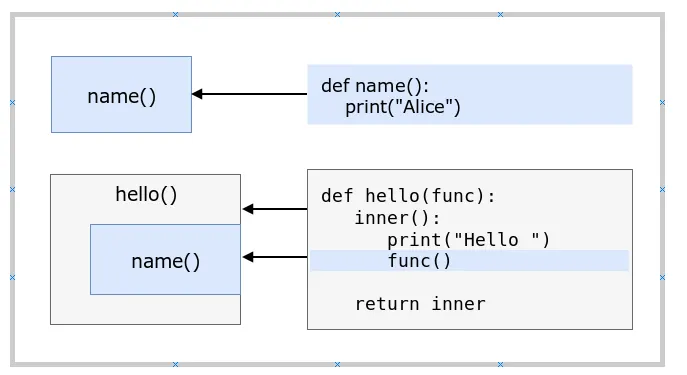

In [ ]:
def do_something1(func):
    def wrapper():
        start = time.time()
        func()
        end = time.time()
        print(f"timestamps: {end - start}")
    return wrapper

@do_something1
def func():
    time.sleep(5)
    print("Hello")

func()

#### manual decorator

In [ ]:
def do_something2(func):
    def wrapper():
        start = time.time()
        func()
        end = time.time()
        print(f"timestamps: {end - start}")
    return wrapper

def random_function():
    time.sleep(5)
    print("Hello")

random_function = do_something2(random_function)

random_function()

### summary

| **Concept**               | **Description**                                                                 | **Example**                                                                 |
|---------------------------|---------------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| **Function Definition**   | Define a function using `def`.                                                  | `def greet(name): print(f"Hello, {name}!")`                                 |
| **Lambda Function**       | Single-expression anonymous function.                                           | `square = lambda x: x ** 2`                                                |
| **Positional Arguments**  | Arguments passed in order.                                                      | `add(2, 3)`                                                                |
| **Keyword Arguments**     | Arguments passed with parameter names.                                          | `greet(name="Alice", message="Hello")`                                     |
| **Default Arguments**     | Parameters with default values.                                                 | `greet(name="Alice")`                                                      |
| **Variable-Length Args**  | Accept any number of arguments (`*args`, `**kwargs`).                          | `print_args(1, 2, 3, name="Alice")`                                        |
| **Return Value**          | Return a value using `return`.                                                  | `return a + b`                                                             |
| **Scope**                 | Local vs global variables.                                                      | `x = 10` (global), `y = 5` (local)                                         |
| **Recursion**             | Function calls itself.                                                          | `factorial(n)`                                                             |
| **Decorators**            | Modify behavior of functions.                                                   | `@decorator`                                                               |
| **Generators**            | Produce values lazily using `yield`.                                            | `yield i`                                                                  |

## debugging a training loop

In [ ]:
# Simulate a training loop
for epoch in range(1, 11):
    loss = 1.0 / epoch  # Simulated loss

    # Save a checkpoint every 2 epochs
    if epoch % 2 == 0:
        checkpoint = {"epoch": epoch, "loss": loss}
        with open("checkpoint.pkl", "wb") as f:
            pickle.dump(checkpoint, f)
        print(f"Checkpoint saved at epoch {epoch}")

    # Simulate an error at epoch 5
    if epoch == 5:
        print("Simulating an error...")
        break  # Stop execution

# Debugging: Load the last checkpoint
with open("checkpoint.pkl", "rb") as f:
    checkpoint = pickle.load(f)

print(f"Resuming from epoch {checkpoint['epoch']} with loss {checkpoint['loss']}")

## OOP

# Object-Oriented Programming (OOP)
## Implementing `Env` and `Agent` Classes

### Table of Contents

1. **Introduction**
   - Project Overview
   - OOP Concepts Illustrated
   - RL Components as Objects

2. **Core Class Design**
   - `Env` (Environment) Class
     - Key Attributes
     - Essential Methods
   - `Agent` Class
     - Key Attributes
     - Essential Methods

3. **Class Implementation**

   ```python
   class Env:
       def __init__(self, ...):
           # Initialize state, action space, etc.
       
       def reset(self):
           # Reset environment to initial state
       
       def step(self, action):
           # Execute action, return (next_state, reward, done, info)
       
       def render(self):
           # Visualize current state
  ```
  ```python
  class Agent:
    def __init__(self):
        # Initialize policy, value estimates, etc.
        pass
    def action(self, state):
        # Select action based on current policy
        pass
    def update(self, state, action, reward, next_state):
        # Learn from experience
        pass
    def save_model(self, path):
        # Save learned parameters
        pass
  ```

## training or evaluation loop

```python
env = Env()
agent = Agent()

for episode in range(EPISODES):
    state = env.reset()
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.update(state, action, reward, next_state)
        state = next_state
```

# OOP concepts
- Encapsulation: Hiding the Q-table and learning parameters

- Inheritance: Creating a specialized DQN agent from a base agent

- Polymorphism: Using different agent types interchangeably

- Abstraction: Defining an interface for RL environments

## Encapsulation - Q-Learning Agent

In [ ]:
class QLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.1, discount_factor=0.9, exploration_rate=0.1):
        # Encapsulated attributes
        self._q_table = np.zeros((state_size, action_size))  # Private attribute
        self._learning_rate = learning_rate
        self._discount_factor = discount_factor
        self._exploration_rate = exploration_rate

    def action(self, state):
        if np.random.random() < self._exploration_rate:
            return np.random.randint(0, len(self._q_table[state]))
        return np.argmax(self._q_table[state])

    def update(self, state, action, reward, next_state):
        # Encapsulated method for Q-value update
        best_next_action = np.argmax(self._q_table[next_state])
        td_target = reward + self._discount_factor * self._q_table[next_state][best_next_action]
        td_error = td_target - self._q_table[state][action]
        self._q_table[state][action] += self._learning_rate * td_error

# Usage
agent = QLearningAgent(state_size=10, action_size=4)

## Inheritance - Base Agent and DQN Agent

In [ ]:
class BaseAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size

    def get_action(self, state):
        raise NotImplementedError("Subclasses must implement get_action")

    def update(self, state, action, reward, next_state, done):
        raise NotImplementedError("Subclasses must implement update")

class DQNAgent(BaseAgent):
    def __init__(self, state_size, action_size):
        super().__init__(state_size, action_size)
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=0.001))
        return model

    def get_action(self, state):
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])

    def update(self, state, action, reward, next_state, done):
        target = reward
        if not done:
            target = reward + 0.95 * np.amax(self.model.predict(next_state)[0])
        target_f = self.model.predict(state)
        target_f[0][action] = target
        self.model.fit(state, target_f, epochs=1, verbose=0)

# Usage
dqn_agent = DQNAgent(state_size=4, action_size=2)

## Polymorphism - Different Agent Types


In [ ]:
class RandomAgent:
    def get_action(self, state):
        return np.random.choice([0, 1])

    def update(self, *args):
        pass

class PolicyGradientAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.model = self._build_model()

    def get_action(self, state):
        policy = self.model.predict(state)[0]
        return np.random.choice(self.action_size, p=policy)

    def update(self, states, actions, rewards):
        # Policy gradient update implementation
        pass

# Polymorphic function that works with any agent type
def run_episode(env, agent):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.get_action(state)  # Polymorphic call
        next_state, reward, done, _ = env.step(action)
        agent.update(state, action, reward, next_state, done)  # Polymorphic call
        state = next_state
        total_reward += reward

    return total_reward

# Usage
env = gym.make('CartPole-v1')
agents = [RandomAgent(), PolicyGradientAgent(state_size=4, action_size=2)]
for agent in agents:
    reward = run_episode(env, agent)
    print(f"Agent: {type(agent).__name__}, Reward: {reward}")

##  Abstraction - RL Environment Interface

In [ ]:
from abc import ABC, abstractmethod

class RLEnvironment(ABC):
    @abstractmethod
    def reset(self):
        """Reset the environment to initial state"""
        pass

    @abstractmethod
    def step(self, action):
        """Execute one action in the environment"""
        pass

    @abstractmethod
    def get_state_size(self):
        """Get the size of the state space"""
        pass

    @abstractmethod
    def get_action_size(self):
        """Get the size of the action space"""
        pass

class MazeEnvironment(RLEnvironment):
    def __init__(self, maze):
        self.maze = maze
        self.current_position = (0, 0)
        self.goal = (len(maze)-1, len(maze[0])-1)

    def reset(self):
        self.current_position = (0, 0)
        return self.current_position

    def step(self, action):
        # 0: up, 1: right, 2: down, 3: left
        x, y = self.current_position
        if action == 0 and x > 0 and self.maze[x-1][y] != 1:
            x -= 1
        elif action == 1 and y < len(self.maze[0])-1 and self.maze[x][y+1] != 1:
            y += 1
        elif action == 2 and x < len(self.maze)-1 and self.maze[x+1][y] != 1:
            x += 1
        elif action == 3 and y > 0 and self.maze[x][y-1] != 1:
            y -= 1

        self.current_position = (x, y)
        done = (x, y) == self.goal
        reward = 1 if done else -0.01
        return (x, y), reward, done, {}

    def get_state_size(self):
        return 2  # (x,y) position

    def get_action_size(self):
        return 4  # up, right, down, left

# Usage
maze = [
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 0, 0, 0],
    [1, 0, 1, 0]
]
env = MazeEnvironment(maze)

# Numpy

## Import

In [ ]:
import numpy as np

##  Basic Array Operations

In [ ]:
# Creating arrays
arr1 = np.array([1, 2, 3, 4, 5])  # 1D array
arr2 = np.array([[1, 2, 3], [4, 5, 6]])  # 2D array

# Array attributes
print("Shape:", arr2.shape)  # (2, 3)
print("Dimensions:", arr2.ndim)  # 2
print("Size:", arr2.size)  # 6
print("Data type:", arr2.dtype)  # int64

# Array operations
print("Sum:", np.sum(arr1))  # 15
print("Mean:", np.mean(arr1))  # 3.0
print("Max:", np.max(arr1))  # 5
print("Element-wise square:", np.square(arr1))  # [1, 4, 9, 16, 25]

Shape: (2, 3)
Dimensions: 2
Size: 6
Data type: int64
Sum: 15
Mean: 3.0
Max: 5
Element-wise square: [ 1  4  9 16 25]


## Matrix Operations

In [ ]:
# Matrix creation
matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[5, 6], [7, 8]])

# Matrix multiplication
matrix_product = np.dot(matrix_a, matrix_b)
# Alternative: matrix_a @ matrix_b
print("Matrix product:\n", matrix_product)

# Transpose
print("Transpose:\n", matrix_a.T)

# Determinant
print("Determinant:", np.linalg.det(matrix_a))

# Inverse
print("Inverse:\n", np.linalg.inv(matrix_a))

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix_a)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Matrix product:
 [[19 22]
 [43 50]]
Transpose:
 [[1 3]
 [2 4]]
Determinant: -2.0000000000000004
Inverse:
 [[-2.   1. ]
 [ 1.5 -0.5]]
Eigenvalues: [-0.37228132  5.37228132]
Eigenvectors:
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


## Array Indexing and Slicing

In [ ]:
# Create a 3x4 array
arr = np.array([[1, 2, 3, 4],
                [5, 6, 7, 8],
                [9, 10, 11, 12]])

# Indexing
print("Element at row 1, column 2:", arr[1, 2])  # 7

# Slicing
print("First row:", arr[0, :])  # [1 2 3 4]
print("Second column:", arr[:, 1])  # [2, 6, 10]
print("Submatrix:\n", arr[1:3, 0:2])  # [[5, 6], [9, 10]]

# Boolean indexing
mask = arr > 5
print("Elements > 5:", arr[mask])  # [6, 7, 8, 9, 10, 11, 12]

Element at row 1, column 2: 7
First row: [1 2 3 4]
Second column: [ 2  6 10]
Submatrix:
 [[ 5  6]
 [ 9 10]]
Elements > 5: [ 6  7  8  9 10 11 12]


## Random Number Generation

In [ ]:
# Random numbers between 0 and 1
random_array = np.random.random((3, 3))
print("Random 3x3 array:\n", random_array)

# Random integers
random_ints = np.random.randint(0, 10, size=5)
print("Random integers:", random_ints)

# Normal distribution
normal_dist = np.random.normal(0, 1, 1000)  # mean=0, std=1

# Shuffling
arr = np.arange(10)
np.random.shuffle(arr)
print("Shuffled array:", arr)

Random 3x3 array:
 [[0.54127391 0.07547132 0.33669042]
 [0.33506874 0.64962722 0.07725179]
 [0.82007809 0.96202746 0.04622391]]
Random integers: [7 0 2 3 9]
Shuffled array: [2 9 6 1 5 8 0 3 7 4]


##  Practical Application: Image Processing

In [ ]:
# Simulate a grayscale image (2D array)
image = np.random.randint(0, 256, size=(100, 100), dtype=np.uint8)

# Image operations
brightened_image = np.clip(image * 1.5, 0, 255).astype(np.uint8)
inverted_image = 255 - image

# Kernel for edge detection
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

# Apply convolution (simplified)
def convolve(image, kernel):
    output = np.zeros_like(image)
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            output[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * kernel)
    return output

edges = convolve(image, kernel)

## Linear Regression with NumPy

In [ ]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term (x0 = 1)
X_b = np.c_[np.ones((100, 1)), X]

# Normal equation: theta = (X^T X)^-1 X^T y
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Intercept:", theta[0][0])  # Close to 4
print("Slope:", theta[1][0])  # Close to 3

# Make predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

## Performance Comparison: NumPy vs Python Lists

In [ ]:
import time

size = 1000000

# Python list
start = time.time()
python_list = list(range(size))
result = [x * 2 for x in python_list]
end = time.time()
print("Python list time:", end - start)

# NumPy array
start = time.time()
numpy_array = np.arange(size)
result = numpy_array * 2
end = time.time()
print("NumPy array time:", end - start)

Python list time: 0.10021567344665527
NumPy array time: 0.025577068328857422


# Seaborn and Matplotlib

## Import

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

## Basic Matplotlib Plots

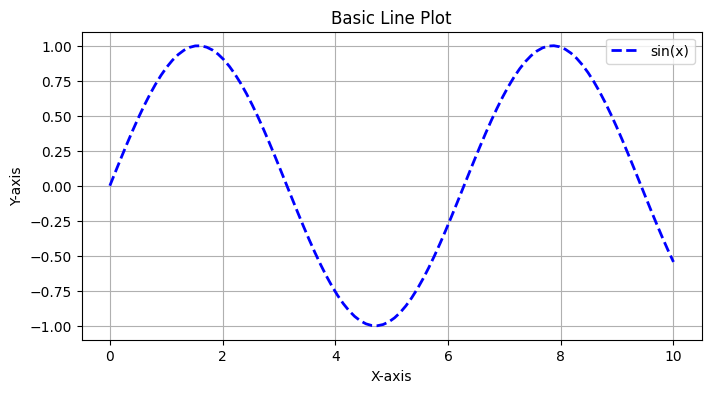

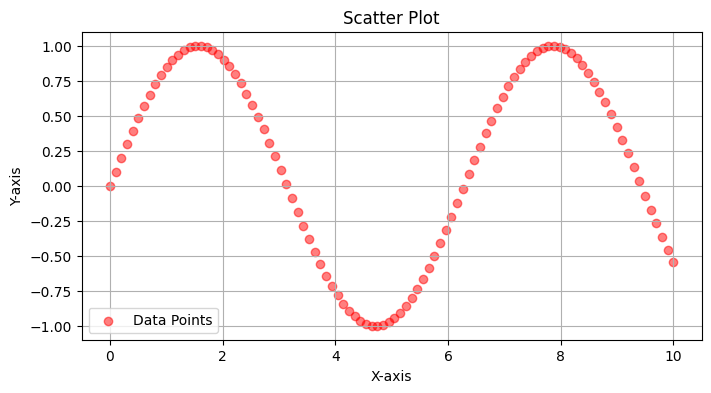

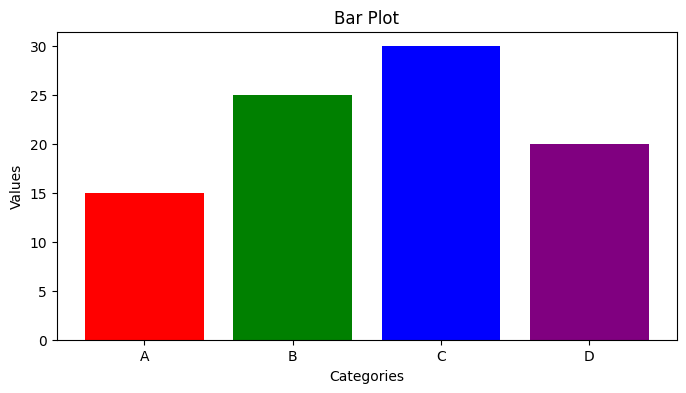

In [ ]:
# Create some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Line plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='sin(x)', color='blue', linestyle='--', linewidth=2)
plt.title("Basic Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(x, y, c='red', marker='o', alpha=0.5, label='Data Points')
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

# Bar plot
categories = ['A', 'B', 'C', 'D']
values = [15, 25, 30, 20]
plt.figure(figsize=(8, 4))
plt.bar(categories, values, color=['red', 'green', 'blue', 'purple'])
plt.title("Bar Plot")
plt.xlabel("Categories")
plt.ylabel("Values")
plt.show()

## Seaborn Statistical Visualizations

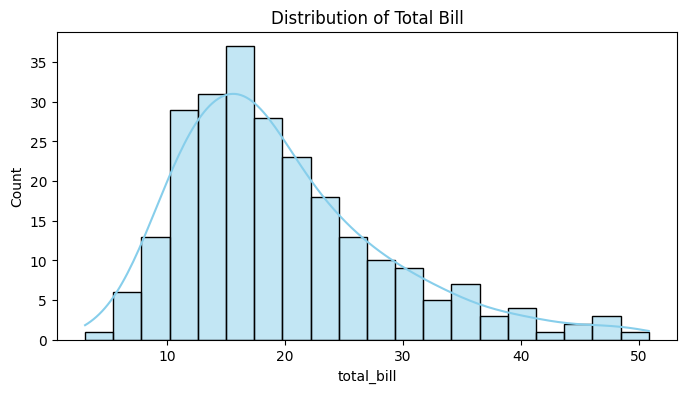

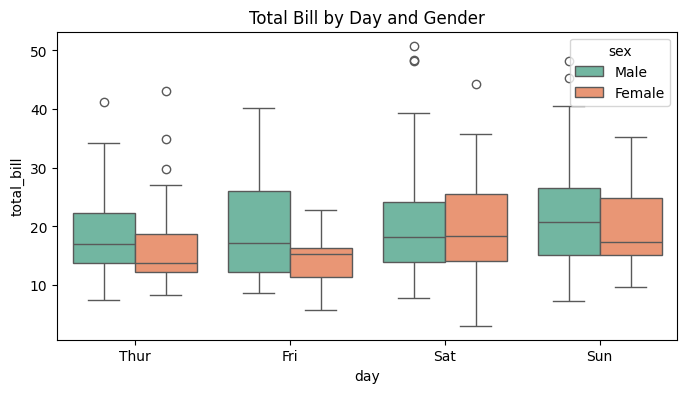

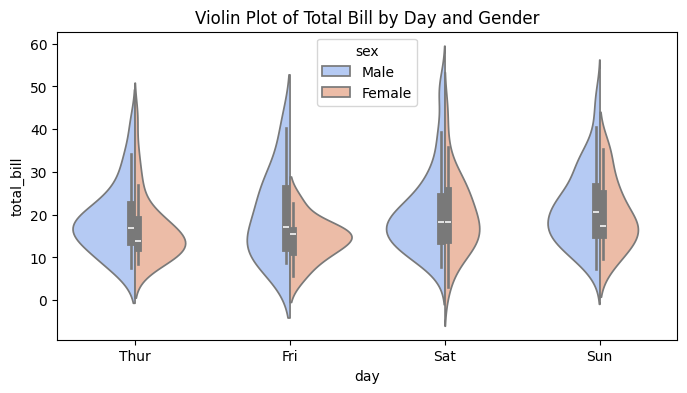

In [ ]:
import seaborn as sns
import pandas as pd

# Load built-in dataset
tips = sns.load_dataset('tips')

# Distribution plot
plt.figure(figsize=(8, 4))
sns.histplot(data=tips, x='total_bill', kde=True, bins=20, color='skyblue')
plt.title("Distribution of Total Bill")
plt.show()

# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', palette='Set2')
plt.title("Total Bill by Day and Gender")
plt.show()

# Violin plot
plt.figure(figsize=(8, 4))
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', split=True, palette='coolwarm')
plt.title("Violin Plot of Total Bill by Day and Gender")
plt.show()

## Advanced Seaborn Plots

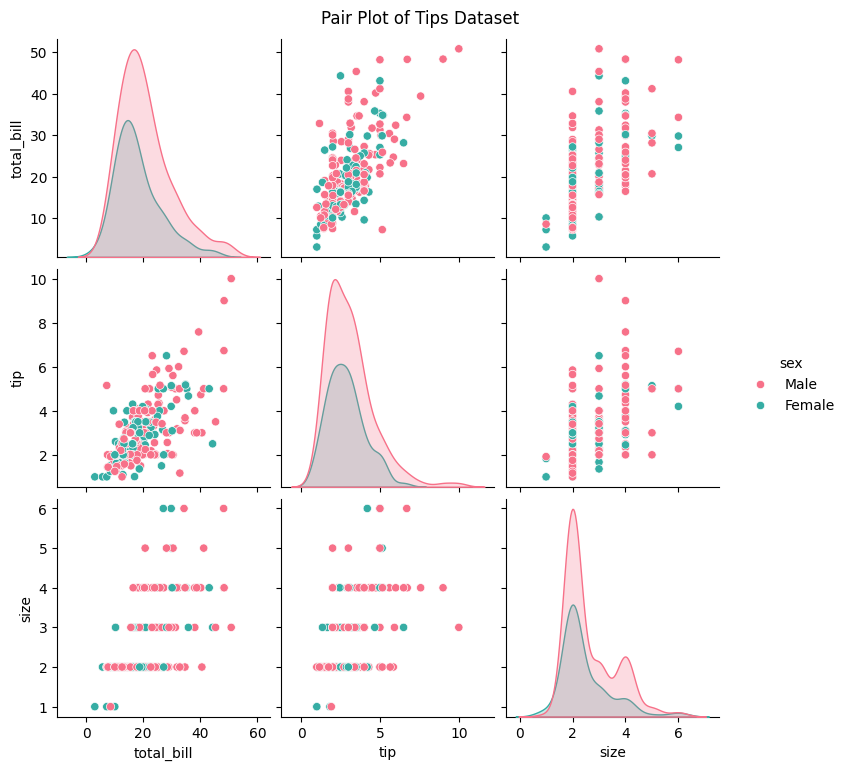

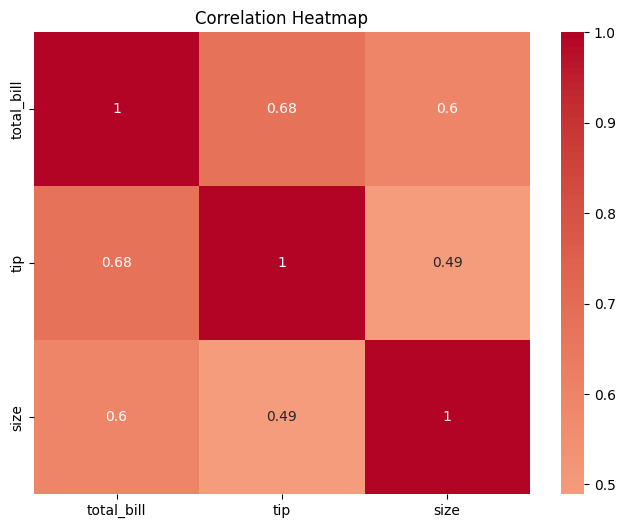

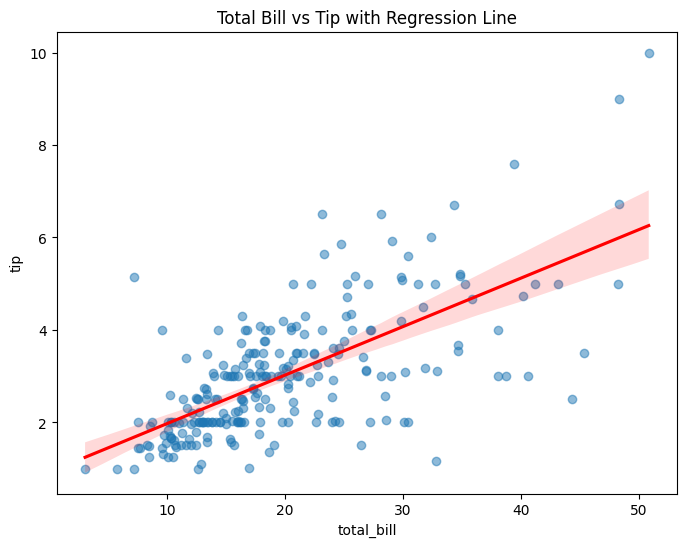

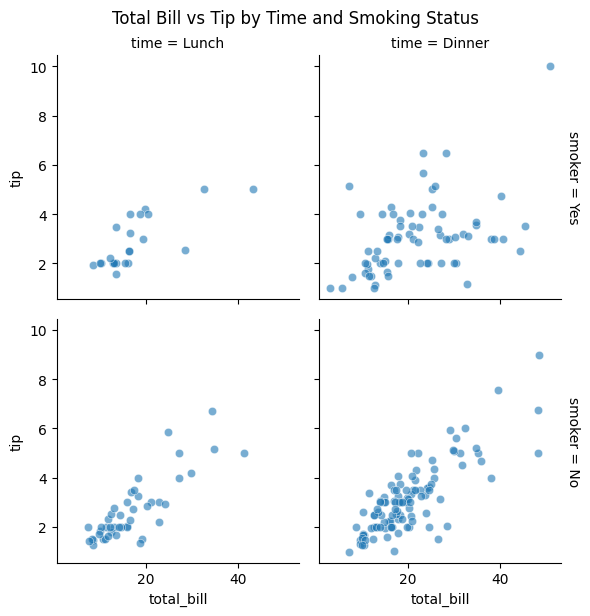

In [ ]:
# Pair plot (scatter matrix)
sns.pairplot(tips, hue='sex', palette='husl', diag_kind='kde')
plt.suptitle("Pair Plot of Tips Dataset", y=1.02)
plt.show()

# Heatmap
corr = tips.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

# Regression plot
plt.figure(figsize=(8, 6))
sns.regplot(data=tips, x='total_bill', y='tip', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Total Bill vs Tip with Regression Line")
plt.show()

# FacetGrid
g = sns.FacetGrid(tips, col='time', row='smoker', margin_titles=True)
g.map(sns.scatterplot, 'total_bill', 'tip', alpha=0.6)
g.fig.suptitle("Total Bill vs Tip by Time and Smoking Status", y=1.02)
plt.show()

## Customizing Plots

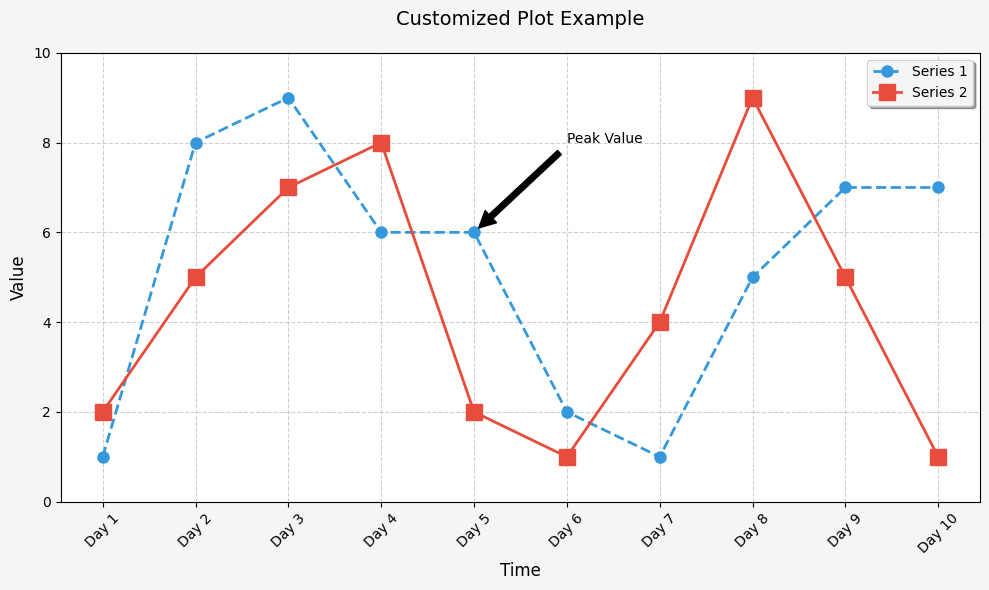

In [ ]:
# Create a customized figure
plt.figure(figsize=(10, 6), facecolor='#f5f5f5')  # Set figure size and background color

# Create data
x = np.arange(1, 11)
y1 = np.random.randint(1, 10, size=10)
y2 = np.random.randint(1, 10, size=10)

# Plot with customization
plt.plot(x, y1, label='Series 1', marker='o', markersize=8,
         linestyle='--', linewidth=2, color='#3498db')
plt.plot(x, y2, label='Series 2', marker='s', markersize=12,
         linestyle='-', linewidth=2, color='#e74c3c')

# Customize axes and grid
plt.xticks(x, [f'Day {i}' for i in x], rotation=45)
plt.yticks(np.arange(0, 11, 2))
plt.grid(True, linestyle='--', alpha=0.6)

# Add titles and legend
plt.title("Customized Plot Example", fontsize=14, pad=20)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(fontsize=10, framealpha=0.9, shadow=True)

# Add annotations
plt.annotate('Peak Value', xy=(5, y1[4]), xytext=(6, 8),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Adjust layout
plt.tight_layout()
plt.show()

## Subplots and Multiple Plots

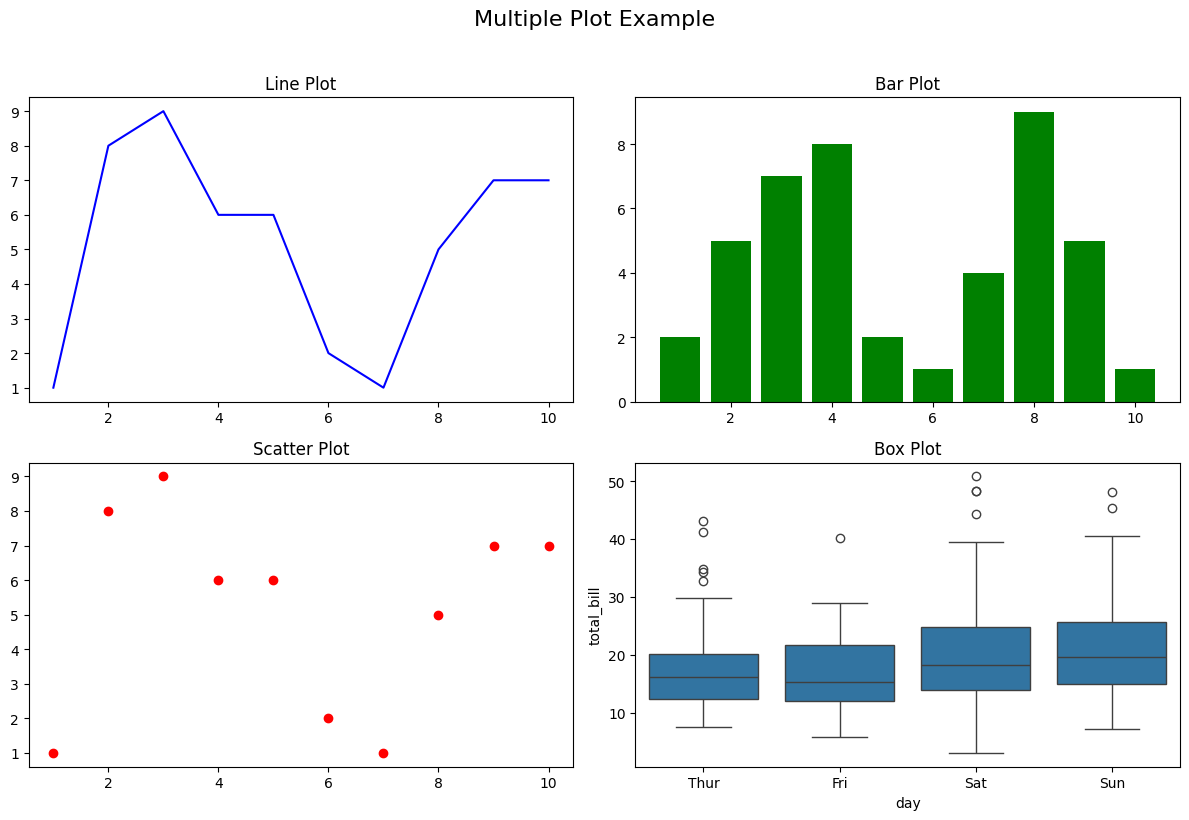

In [ ]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Multiple Plot Example", fontsize=16, y=1.02)

# Plot 1: Line plot
axes[0, 0].plot(x, y1, color='blue')
axes[0, 0].set_title("Line Plot")

# Plot 2: Bar plot
axes[0, 1].bar(x, y2, color='green')
axes[0, 1].set_title("Bar Plot")

# Plot 3: Scatter plot
axes[1, 0].scatter(x, y1, color='red')
axes[1, 0].set_title("Scatter Plot")

# Plot 4: Box plot
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[1, 1])
axes[1, 1].set_title("Box Plot")

# Adjust layout
plt.tight_layout()
plt.show()

## Saving Plots

<ipython-input-24-8fc3ec409e25>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-24-8fc3ec409e25>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




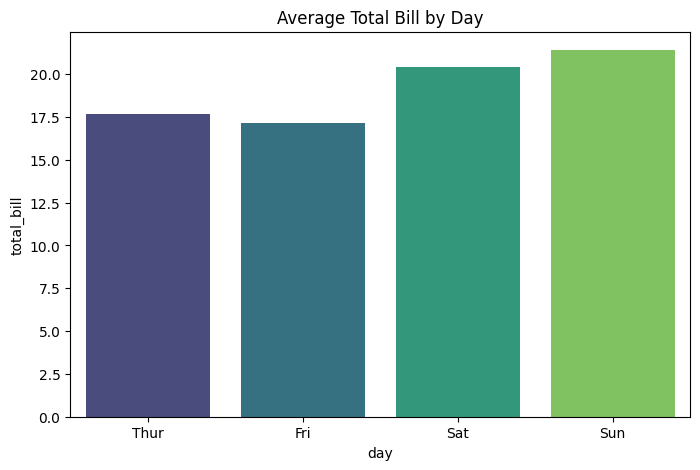

In [ ]:
# Create a plot
plt.figure(figsize=(8, 5))
sns.barplot(data=tips, x='day', y='total_bill', ci=None, palette='viridis')
plt.title("Average Total Bill by Day")

# Save in different formats
plt.savefig('plot.png', dpi=300, bbox_inches='tight')  # PNG format
plt.savefig('plot.pdf', bbox_inches='tight')  # PDF format
plt.savefig('plot.jpg',  bbox_inches='tight')  # JPG format
plt.savefig('plot.svg', bbox_inches='tight')  # SVG format

plt.show()

## Time Series Visualization

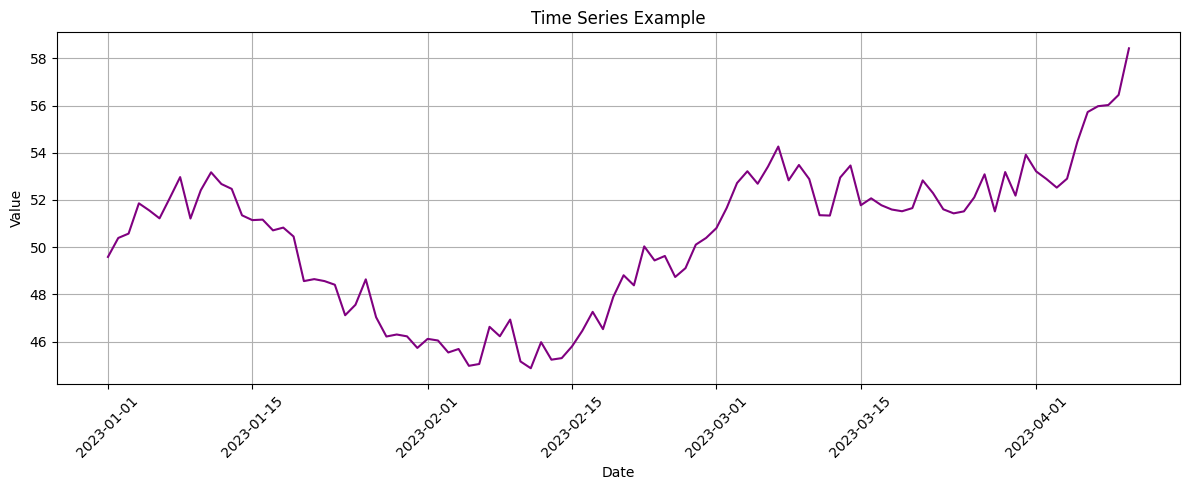

<ipython-input-25-31c47a3448e5>:21: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




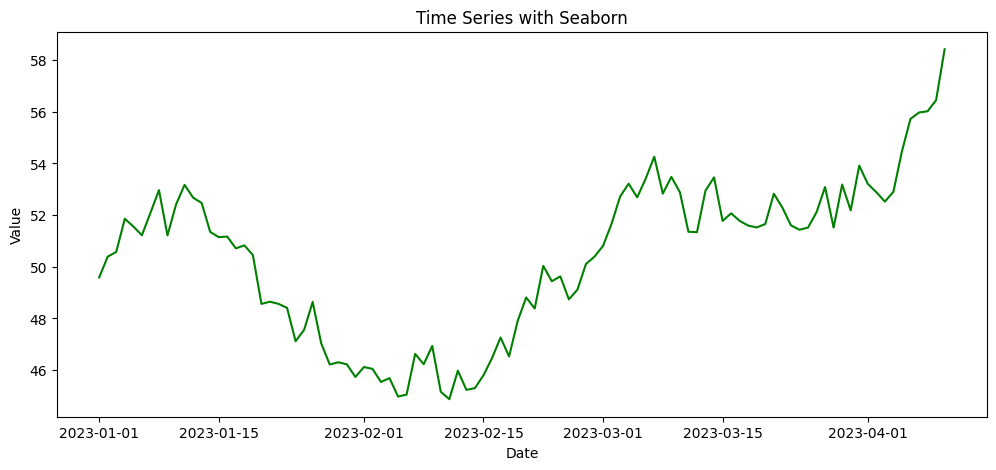

In [ ]:
# Create time series data
dates = pd.date_range('2023-01-01', periods=100, freq='D')
values = np.cumsum(np.random.randn(100)) + 50

# Create DataFrame
ts_data = pd.DataFrame({'Date': dates, 'Value': values})

# Plot time series
plt.figure(figsize=(12, 5))
plt.plot(ts_data['Date'], ts_data['Value'], color='purple')
plt.title("Time Series Example")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Using seaborn for time series
plt.figure(figsize=(12, 5))
sns.lineplot(data=ts_data, x='Date', y='Value', ci=None, color='green')
plt.title("Time Series with Seaborn")
plt.show()

In [ ]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

# Crate a new environment
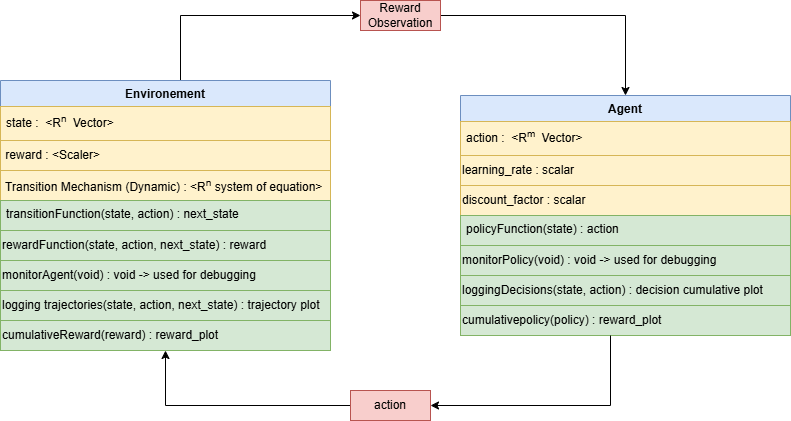

## Environment Class
### properties
  - State
  - Reward
  - Transition Mechanism (Dynamic)

### Methods
  - Transition Function
  - Reward Function
  - Monitor agent behavior
  - logging trajectories
  - plot cumulative Reward

## Agent Class
### properties
  - Action
  - Learning Rate
  - Discount factor

### Methods
  - Policy Function
  - Monitor policy  
  - logging agent decisions
  - plot cumulative policy

# Pytorch

## math

In [ ]:
import sympy as sym
import numpy as np

define a symbolic variable

In [ ]:
# x defined as symbolic variable
x = sym.symbols('x')

define a symbolic function

In [ ]:
# define a symbolic function
fx = 3*(x**2) + 2*x + 1

In [ ]:
fx

3*x**2 + 2*x + 1

substitute value in function ```f(x)```

In [ ]:
fx.subs(x,2)

17

first derivative of ```f(x)```

In [ ]:
dfx = sym.diff(fx,x)

In [ ]:
dfx

6*x + 2

second derivative of ```f(x)```

In [ ]:
d2fx = sym.diff(dfx,x)

In [ ]:
d2fx

6

Gradient descent

In [ ]:
from tqdm import tqdm
i = 0
error = 50_000
xa = 20 # init
alpha = 0.05 # step
while True:
  xa = xa - alpha*dfx.subs(x,xa)
  error = dfx.subs(x,xa)
  print(f"error (step{i}):{error}")
  if abs(error) < 0.01:
    break
  i += 1
print("-"*20)
print(f"value of f(xa) : {fx.subs(x,xa)}")

error (step0):85.4000000000000
error (step1):59.7800000000000
error (step2):41.8460000000000
error (step3):29.2922000000000
error (step4):20.5045400000000
error (step5):14.3531780000000
error (step6):10.0472246000000
error (step7):7.03305722000000
error (step8):4.92314005400000
error (step9):3.44619803780000
error (step10):2.41233862646000
error (step11):1.68863703852200
error (step12):1.18204592696540
error (step13):0.827432148875780
error (step14):0.579202504213046
error (step15):0.405441752949132
error (step16):0.283809227064393
error (step17):0.198666458945075
error (step18):0.139066521261552
error (step19):0.0973465648830865
error (step20):0.0681425954181605
error (step21):0.0476998167927125
error (step22):0.0333898717548988
error (step23):0.0233729102284292
error (step24):0.0163610371599003
error (step25):0.0114527260119304
error (step26):0.00801690820835121
--------------------
value of f(xa) : 0.666672022568102


multivariate function and partial derivatives

In [ ]:
y = sym.symbols('y')
z = sym.symbols('z')
fzy = (y)*z**2 - z*y**2 + 2*y*z
dzfzy = sym.diff(fzy,z)
dyfzy = sym.diff(fzy,y)
dzyfzy = sym.diff(fzy,z,y)
fzy

-y**2*z + y*z**2 + 2*y*z

In [ ]:
dzfzy

-y**2 + 2*y*z + 2*y

In [ ]:
dyfzy

-2*y*z + z**2 + 2*z

In [ ]:
dzyfzy

2*(-y + z + 1)

substitute in values in multivariate function

In [ ]:
fzy.evalf(subs={y: 20,z : 20})

800.000000000000

In [ ]:
v = sym.lambdify((y,z),fzy,'numpy')
dvz = sym.lambdify((y,z),dzfzy,'numpy')
dvy = sym.lambdify((y,z),dyfzy,'numpy')
dvzy = sym.lambdify((y,z),dzyfzy,'numpy')
dvy(1,1)

1

2-D Gradient Descent

In [ ]:
i = 0
error = 50_000
ya, za = [1,1]
alpha = 0.05
while abs(error) > .1 :
  dy = dvy(ya,za)
  dz = dvz(ya,za)
  ya = ya - alpha*dy
  za = za - alpha*dz
  error = dvzy(ya,za)
  print(error)
print("-"*20)
print(v(ya,za))
print(ya,za)

1.8
1.6195000000000002
1.4541972093750002
1.3010318910581706
1.1578371567360228
1.023096374682873
0.8957689700441545
0.7751613538007587
0.6608288554344
0.5524999258310608
0.4500171110661515
0.35329123921565975
0.2622664076022614
0.17689400887386042
0.09711438504998182
--------------------
-0.1336633253876655
0.7901053841089211 -0.16133742336608803


## autograd

In [ ]:
from torch import tensor
import torch
a = tensor([[5.0]],requires_grad=True)
b = tensor([4.0],requires_grad=True)
c = torch.matmul(a,b)
f = tensor([])
f = a + b
f.backward()
# print(c)
# d = tensor([2.5],requires_grad=True)
# e = torch.matmul(c,d)
# print(e)
# e.backward()
# print(d.grad)
print(a.grad)
print(b.grad)


## unbind and pack tensor

In [ ]:
x = torch.randn(3, 4)
print(x)
# Unbind the tensor along dimension 0
unbound_tensors = torch.unbind(x, dim=0)
print(unbound_tensors)
# Pack the unbound tensors back into a single tensor
packed_tensor = torch.stack(unbound_tensors, dim=0)
print(packed_tensor)

## hooks

In [ ]:
a = tensor([[5.0]],requires_grad=True)
b = tensor([4.0],requires_grad=True)
c = torch.matmul(a,b)
d = tensor([2.5],requires_grad=True)
handle = c.register_hook(lambda grad : print(grad))
c.retain_grad()
e = c * d
a.register_hook(lambda grad : print(grad))
b.register_hook(lambda grad : print(grad))
e.backward()
handle.remove()

## train a simple regression model

### Loss function
-----
*   MSE (mean-square-error) -> continuous output`
*   cross-entropy (logistic) -> categorical output (outputs are some probability)

### ANN Regression
-----

#### libraries

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import torch.functional as F
from tqdm import tqdm

In [ ]:
device = 'cuda'

#### data

In [ ]:
N = 100
m = 2
x = torch.randn(size=(N,1))
y = m*x + torch.randn(size=(N,1))/3
plt.plot(x,y,'ob')
plt.legend(['Real data'])
plt.title('regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Model

In [ ]:
# build a sequential model

ann_reg = nn.Sequential(
    nn.Linear(1,1), # input layer
    # nn.ReLU(),      # activation function
    nn.Linear(1,1)  # output layer
)
ann_reg

#### Meta-parameters

In [ ]:
# learning rate
LR = .05
# loss function
lossfun = nn.MSELoss()
# optimizer
optimizer = torch.optim.SGD(ann_reg.parameters(),lr=LR)

#### training

In [ ]:
numepochs = 500
losses_logs = torch.zeros(numepochs)

for ei in tqdm(range(numepochs)):
  yh = ann_reg(x)

  loss = lossfun(yh,y)
  losses_logs[ei] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


In [ ]:
plt.plot(losses_logs.detach(),'o')
plt.show()

#### test data
-----

In [ ]:
prediction = ann_reg(x)

plt.plot(x,y,'ob')
plt.plot(x,prediction.detach(),'sg')
plt.show()

In [ ]:
for param in ann_reg.parameters():
  print(param.detach())

## train a simple classification model

#### data preprocess

In [ ]:
numClust = 100
blur = 3

A = [1 , 1]
B = [1 , 10]

a = [ A[1] + np.random.randn(numClust)*blur , A[0] + np.random.randn(numClust)*blur]
b = [ B[1] + np.random.randn(numClust)*blur , B[0] + np.random.randn(numClust)*blur]

labels_np = np.vstack((np.zeros((numClust,1)),np.ones((numClust,1))))

data_np = np.hstack((a,b)).T

# transform to pytorch tensor
labels = torch.tensor(labels_np).float()
data = torch.tensor(data_np).float()

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'gs')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.title('data')
plt.show()

#### Model

In [ ]:
ann_class = nn.Sequential(
    nn.Linear(2,6,True),
    nn.ReLU(),
    nn.Linear(6,4,True),
    nn.ReLU(),
    nn.Linear(4,1,True),
    nn.ReLU(),
    nn.Linear(1,1,True),
    nn.Sigmoid()
)
ann_class

In [ ]:
loss_func2 = nn.BCELoss()
# we can also use BCEwithlogitsloss() and remove the last layer (sigmoid) in ann model

In [ ]:
from tqdm import tqdm
numepochs2 = 2_000
lr_l = [0.1,0.01,0.02,0.03,0.04,0.05]
loss_list = []
for i in range(len(lr_l)):
  loss2 = torch.zeros(numepochs2)
  learning_rate2 = lr_l[i]
  optimizer2 = torch.optim.SGD(ann_class.parameters(),lr = learning_rate2)
  for ep in tqdm(range(numepochs2)):
    yh = ann_class(data)

    loss = loss_func2(yh,labels)
    loss2[ep] = loss

    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
  loss_list.append(loss2)

In [ ]:
for i in range(len(lr_l)):
  plt.plot(loss_list[i].detach(),'o')
plt.show()

#### prediction

In [ ]:
# predictions

predicts = ann_class(data)

prediclabels = predicts>.5
# print(prediclabels)

misclassified = np.where(prediclabels != labels)[0]
print(misclassified)

# accuracy
acc = 100-100*len(misclassified)/(2*numClust)
print(acc)

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0],data[misclassified,1],'rx',markersize='13')
plt.plot(data[(np.where(~prediclabels)[0]),0],data[np.where(~prediclabels)[0],1],'gs')
plt.plot(data[np.where(prediclabels)[0],0],data[np.where(prediclabels)[0],1],'ro')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.title('data')
plt.show()

## Using pre-trained model

### Loading a Pretrained Model

In [ ]:
import torch
import torchvision.models as models

# List all available pretrained models
print("Available models:", [name for name in models.list_models()])

# Load a pretrained model (e.g., ResNet18)
model = models.resnet18(weights='DEFAULT')  # 'DEFAULT' loads the best available weights
print(model)

### Feature Extraction (Freezing Layers)

In [ ]:
# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Replace the final layer for your task
num_classes = 10  # Example for CIFAR-10
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Now only the final layer will be trained

### Fine-Tunning

In [ ]:
# Load model with pretrained weights
model = models.resnet18(weights='DEFAULT')

# Replace the final layer
num_classes = 10
model.fc = nn.Linear(model.fc.in_features, num_classes)

# All layers will be trained (requires_grad=True by default)

### Exmple

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch import nn, optim

# 1. Define transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 2. Load dataset (example with CIFAR-10)
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=32, shuffle=True)

# 3. Load pretrained model
model = torchvision.models.resnet18(weights='DEFAULT')

# 4. Modify for your task
num_classes = 10
model.fc = nn.Linear(model.fc.in_features, num_classes)

# 5. Set up training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 6. Training loop
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:  # Print every 200 batches
            print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss/200:.3f}')
            running_loss = 0.0

print('Finished Training')

### Popular Pretrained Models
```python
# Vision models
resnet = models.resnet50(weights='DEFAULT')
alexnet = models.alexnet(weights='DEFAULT')
vgg = models.vgg16(weights='DEFAULT')
densenet = models.densenet161(weights='DEFAULT')
inception = models.inception_v3(weights='DEFAULT')

# Transformer models (from torchvision)
vit = models.vit_b_16(weights='DEFAULT')
swin = models.swin_t(weights='DEFAULT')

# From huggingface (requires transformers package)
# from transformers import BertModel
# bert = BertModel.from_pretrained('bert-base-uncased')
```

## CNN

1. Convolutional Layer
    Purpose: Extracts spatial features from input data (like edges, textures, patterns).
    Key Concepts:
    Filters/Kernels: Small windows (typically 3x3 or 5x5) that slide over the input
    Feature Maps: Outputs created by each filter
    Stride: How many pixels the filter moves each step (1 or 2 common)
    Padding: Adding zeros around the input to control output size

2. Batch Normalization
    Purpose: Stabilizes and accelerates training by normalizing layer inputs.
    How it works:
    For each mini-batch:
    Calculates mean/variance per channel
    Normalizes: (x - mean) / sqrt(variance + ε)
    Applies learnable scale (γ) and shift (β) parameters

3. Pooling Layer
    Purpose: Reduces spatial dimensions while retaining important features.

    Types:

    - Max Pooling:
      - Takes maximum value
      - Most common
    - Avg Pooling:
      - Takes average value
      - Older nets
    - Global Pool:	Reduces to 1x1 spatially
      - Final layers

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

        # Batch normalization layers
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 512)  # Assuming input size is 32x32 (e.g., CIFAR-10)
        self.fc2 = nn.Linear(512, num_classes)

        # Dropout layer
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # First convolutional block
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool(x)

        # Second convolutional block
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)

        # Third convolutional block
        x = self.conv3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.pool(x)

        # Flatten the output for the fully connected layer
        x = x.view(x.size(0), -1)

        # Fully connected layers with dropout
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Example usage
if __name__ == "__main__":
    # Create the network
    model = CNN(num_classes=10)
    print(model)

    # Create a random input tensor (batch_size=4, channels=3, height=32, width=32)
    input_tensor = torch.randn(4, 3, 32, 32)

    # Forward pass
    output = model(input_tensor)
    print("Output shape:", output.shape)  # Should be [4, 10] for 4 samples and 10 classes

## RNN

In [ ]:
from torch import nn
import torch

In [ ]:
class RNNnet(nn.Module):
  def __init__(self,input_size, hidden_size, num_layers = 1, activation_function = "tanh", bias = True):
    """
    input_size [int]: number feature (dimension, channel and etc)
    hidden_size [int]: dimension of square matrix of hiddein layer weights
    num_layers [int] = 1: number of layers stack on each other
    activation_function [str]  = tanh: activation function selection
    bias [bool]  = True : intercept of hiddein weights
    """
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers

    self.rnn = nn.RNN(self.input_size,self.hidden_size,self.num_layers,activation_function, bias)

    self.out = nn.Linear(self.hidden_size,1)

  def forward(self, x):
    y , h = self.rnn(x)
    o = self.out(y)
    return o
  def train(self,x ,y):
    yh = self.forward(x)
    loss_func = nn.MSELoss()
    loss = loss_func(y,yh)
    if loss < 0.1:
      return loss


In [ ]:

x = torch.rand(10,2,10)

## M-step lookahead

### Define the graph

In [ ]:
from collections import defaultdict
import heapq

class Graph:
    def __init__(self):
        self.edges = defaultdict(dict)  # {u: {v: weight}}

    def add_edge(self, u, v, weight):
        self.edges[u][v] = weight
        self.edges[v][u] = weight  # Undirected graph

# Example graph
graph = Graph()
graph.add_edge('A', 'B', 2)
graph.add_edge('A', 'C', 4)
graph.add_edge('B', 'D', 1)
graph.add_edge('B', 'E', 3)
graph.add_edge('D', 'H', 2)
graph.add_edge('D', 'I', 8)
graph.add_edge('E', 'J', 7)
graph.add_edge('E', 'K', 6)
graph.add_edge('C', 'F', 1)
graph.add_edge('C', 'G', 0)
graph.add_edge('F', 'L', 5)
graph.add_edge('F', 'M', 2)
graph.add_edge('G', 'N', 1)
graph.add_edge('G', 'O', 0)
graph.add_edge('H', 'T', 0)
graph.add_edge('I', 'T', 0)
graph.add_edge('J', 'T', 0)
graph.add_edge('K', 'T', 0)
graph.add_edge('L', 'T', 0)
graph.add_edge('M', 'T', 0)
graph.add_edge('N', 'T', 0)
graph.add_edge('O', 'T', 0)

### algorithm

In [ ]:
def m_step_lookahead(graph, start, goal, M):
    def evaluate_paths(current, path, current_cost, depth):
        if depth == M or current == goal:
            # Estimate remaining cost (heuristic: Dijkstra's shortest path)
            remaining_cost = dijkstra(graph, current, goal)
            total_cost = current_cost + remaining_cost
            return total_cost, path
        else:
            min_total_cost = float('inf')
            best_path = None
            for neighbor, weight in graph.edges[current].items():
                if neighbor not in path:  # Avoid cycles
                    new_path = path + [neighbor]
                    new_cost = current_cost + weight
                    total_cost, full_path = evaluate_paths(neighbor, new_path, new_cost, depth + 1)
                    if total_cost < min_total_cost:
                        min_total_cost = total_cost
                        best_path = full_path
            return min_total_cost, best_path

    # Dijkstra's algorithm for remaining cost estimation
    def dijkstra(graph, start, goal):
        heap = [(0, start)]
        visited = set()
        while heap:
            cost, node = heapq.heappop(heap)
            if node == goal:
                return cost
            if node not in visited:
                visited.add(node)
                for neighbor, weight in graph.edges[node].items():
                    heapq.heappush(heap, (cost + weight, neighbor))
        return float('inf')  # No path found

    # Evaluate all M-step paths from start
    _, best_path = evaluate_paths(start, [start], 0, 0)
    if best_path and len(best_path) > 1:
        return best_path[1]  # Best immediate next action
    else:
        return None  # No valid path found

In [ ]:
start = 'A'
goal = 'T'
M = 3  # Lookahead depth

best_action = m_step_lookahead(graph, start, goal, M)
print(f"Best immediate action from {start} with {M}-step lookahead: {best_action}")

## beam search

In [ ]:
def beam_search(start_state, K, M, evaluate_fn):
    beam = [(start_state, [], 0)]  # (state, path, score)
    for _ in range(M):
        candidates = []
        for state, path, score in beam:
            for action in possible_actions(state):
                next_state = apply_action(state, action)
                new_score = score + evaluate_fn(next_state)
                candidates.append((next_state, path + [action], new_score))
        # Keep top-K candidates
        beam = sorted(candidates, key=lambda x: -x[2])[:K]
    return beam[0][1]  # Best path found

| Feature               | M-step Lookahead                          | Beam Search                          |
|-----------------------|------------------------------------------|--------------------------------------|
| **Search Strategy**   | Exhaustive search up to depth `M`        | Keeps top-`K` branches at each step  |
| **Memory**           | High (exponential in `M`)                | Low (fixed by beam width `K`)        |
| **Optimality**       | More optimal                             | Suboptimal (due to pruning)          |
| **Use Cases**        | Pathfinding, game AI                     | NLP, sequence generation            |

---

## When They Are Equivalent
- Beam Search ≈ M-step Lookahead **only if**:
  - Beam width `K` covers all possible branches
  - No pruning is applied (becomes BFS)

# RL libraries

## Stable-baseline
https://stable-baselines3.readthedocs.io/en/master/

# Introduction to Stable-Baselines3
## A High-Quality Reinforcement Learning Library

### Key Features
- ✅ **Implemented Algorithms**:
  - PPO, A2C, DQN, SAC, TD3, etc.
- ✅ **Key Benefits**:
  - Standardized interfaces
  - TensorBoard integration
  - Environment wrappers
  - Type hints & documentation

---

## Basic Usage Example
### 1. Installation

```!pip install stable-baselines3[extra]  # Includes gym and tensorboard```

## install library

In [ ]:
!pip install stable-baselines3[extra]

## training a PPO agent (cart pole)

In [ ]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Create vectorized environment (parallel training)
env = make_vec_env("CartPole-v1")

# Instantiate the agent
model = PPO(
    "MlpPolicy",
    env,
    verbose=1,
    tensorboard_log="./ppo_cartpole/"
)

# Train for 10,000 timesteps
model.learn(total_timesteps=10_000)

# Save the model
model.save("ppo_cartpole")

In [ ]:
!tensorboard --logdir ./ppo_cartpole/

## PPO agent

In [ ]:
from tqdm import tqdm
import cv2
# Load the saved model
model = PPO.load("./ppo_cartpole.zip")

# Evaluate
eval_env = make_vec_env("CartPole-v1")
obs = eval_env.reset()
# print(type(obs))
cum_reward_ = 0
cum_reward = list()
for i in tqdm(range(1000)):
    action , _state = model.predict(obs)
    obs, reward, done, info = eval_env.step(action)
    cum_reward_ += sum(reward)
    cum_reward.append(cum_reward_)
    frame = eval_env.render()
    cv2.imwrite(f'./frames/frame_{i}.png',frame)
    if done.all():
        obs = eval_env.reset()

## Random agent

In [ ]:
from tqdm import tqdm
import cv2
import numpy as np
# Evaluate
eval_env2 = gym.make("CartPole-v1")
obs2 = eval_env2.reset()
print(obs2)
# print(type(obs))
cum_reward_2 = 0
cum_reward2 = list()
for j in tqdm(range(1000)):
    action2 = [np.random.randint(0, 1)]
    observation, reward2, terminated, truncated, info = eval_env2.step(action2)
    cum_reward_2 += sum(reward2)
    cum_reward2.append(cum_reward_2)
    frame2 = eval_env2.render()
    cv2.imwrite(f'./frames/frame_{j}.png',frame2)
    print(observation)
    break

In [ ]:
import matplotlib.pyplot as plt
x = [i for i in range(1000)]
plt.plot(x,cum_reward2)
plt.show()

## Evaluation

In [ ]:
import matplotlib.pyplot as plt
x = [i for i in range(1000)]
plt.plot(x,cum_reward)
plt.show()

## Open-AI GYM
https://gymnasium.farama.org/
